# 2 D Numpy Array

In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
filename = '/nyc_subway_weather.csv'
subwayfile_df = pd.read_csv(filename)

In [6]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [7]:
max_station = np.argmax(ridership, axis =1)

In [8]:
max_station[0]

3

In [9]:
overall_mean = ridership.mean()

In [10]:
overall_mean

2342.5999999999999

In [11]:
mean_for_max = ridership[:, 3].mean()

In [12]:
mean_for_max

3239.9000000000001

In [13]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    overall_mean = ridership.mean() # Replace this with your code
    mean_for_max = ridership[:, 3].mean()# Replace this with your code
    
    return (overall_mean, mean_for_max)

In [14]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

# Accessing Elements of a Dataframe

In [15]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

# Change False to True for each block of code to see what it does

In [16]:
mean_all_station = ridership_df.mean()
mean_all_station.mean()

2342.6000000000004

In [17]:
ridership_df.iloc[0].argmax()

'R006'

In [18]:
ridership_df.loc[:,"R006"].mean()

3239.9

In [19]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    overall_mean = mean_all_station.mean() # Replace this with your code
    mean_for_max = ridership_df.loc[:,"R006"].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

In [20]:
mean_riders_for_max_station(ridership)

(2342.6000000000004, 3239.9)

# Calculating Correlation

In [23]:
subwayfile_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [24]:
entries = subwayfile_df['ENTRIESn_hourly']
cum_entries = subwayfile_df['ENTRIESn']
rain = subwayfile_df['meanprecipi']
temp = subwayfile_df['meantempi']

In [25]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    x_std = (x-x.mean())/x.std(ddof=0)
    y_std = (y-y.mean())/y.std(ddof=0)
    
    return (x_std * y_std).mean()

In [111]:
correlation(cum_entries,temp)

0.01541997038728297

In [26]:
print (correlation(entries,temp))
print (correlation(rain,temp))
print (correlation(entries,cum_entries))

-0.026693348321569912
-0.22903432340833663
0.5858954707662182


# Dataframe Vectorized Operations

In [39]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [40]:
entries_and_exits2 = entries_and_exits.shift()
entries_and_exits2

,ENTRIESn,EXITSn
0,NaN,NaN
1,3144312.0,1088151.0
2,3144335.0,1088159.0
3,3144353.0,1088177.0
4,3144424.0,1088231.0
5,3144594.0,1088275.0
6,3144808.0,1088317.0
7,3144895.0,1088328.0
8,3144905.0,1088331.0
9,3144941.0,1088420.0


In [41]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    entries_and_exits2 = entries_and_exits.shift(periods=1).fillna(0)
    hourly_entries_and_exits = entries_and_exits-entries_and_exits2.fillna(0)
    return hourly_entries_and_exits

In [42]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,3144312.0,1088151.0
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


# Dataframe applymap()

In [32]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [33]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [34]:
def convert_single_grade(grade):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'

In [35]:
def convert_grades(grades):
    return grades_df.applymap(convert_single_grade)

In [36]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


# Dataframe Apply()

In [37]:
grades_df2 = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

In [38]:
# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print('')
    print (convert_grades_curve(grades_df2['exam1']))
    print('')
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print (grades_df2.apply(convert_grades_curve))


Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [A < B < C < D < F]

        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [39]:
def standardize_col(column):
    return (column-column.mean())/column.std()

In [40]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardize_col)

In [41]:
standardize(grades_df2)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


# Dataframe Apply() Use Case 2

In [15]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if True:   
    print (df.apply(np.mean))
    print (df.apply(np.max))

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [16]:
def sort_by_col(col):
    sorted_col = col.sort_values(ascending=False)
    return sorted_col.iloc[1]

In [17]:
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(sort_by_col)

In [18]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

# Adding a Dataframe to a Series

In [46]:
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [19]:
# Adding a Series to a one-row DataFrame 
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [20]:
# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [21]:
# Adding when DataFrame column names match Series index
if True:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [22]:
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


# Standardizing Each Column Again

In [51]:
grades_df3 = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Alan', 'Brian', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [52]:
grades_df3

,exam1,exam2
Alan,43,24
Brian,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [53]:
mean_exam = grades_df3.mean()

In [54]:
mean_exam

exam1    77.7
exam2    57.4
dtype: float64

In [55]:
def standardize(grades_df3):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (grades_df3-mean_exam)/grades_df3.std(ddof=0)

In [56]:
standardize(grades_df3)

,exam1,exam2
Alan,-2.315341,-2.304599
Brian,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [57]:
mean_stud = grades_df3.mean(axis=1)

In [58]:
mean_stud

Alan       33.5
Brian      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [59]:
mean_diffs = grades_df3.sub(mean_stud, axis='index')

In [60]:
mean_diffs.div(grades_df3.std(axis='columns'),axis='index')

,exam1,exam2
Alan,0.707107,-0.707107
Brian,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


In [61]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    return mean_diffs.div(grades_df3.std(axis='columns'),axis='index')

In [63]:
standardize_rows(grades_df3)

,exam1,exam2
Alan,0.707107,-0.707107
Brian,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


# Pandas Groupby()

In [64]:
entries = subwayfile_df['ENTRIESn_hourly']
cum_entries = subwayfile_df['ENTRIESn']

In [7]:
subwayfile_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [24]:
group_UNITDay = subwayfile_df.groupby(['UNIT', 'day_week'])['ENTRIESn'].agg('sum')

In [25]:
group_Day = subwayfile_df.groupby('day_week').mean()['ENTRIESn']

In [26]:
group_Day

day_week
0    2.840276e+07
1    2.846201e+07
2    2.759311e+07
3    2.774932e+07
4    2.798019e+07
5    2.809505e+07
6    2.836150e+07
Name: ENTRIESn, dtype: float64

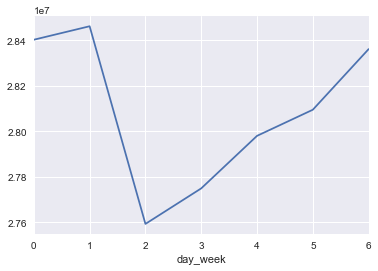

In [27]:
group_Day.plot()

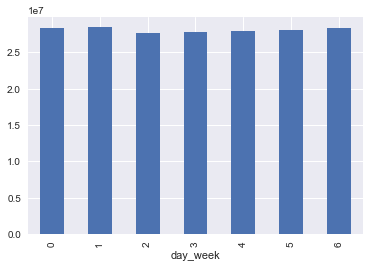

In [71]:
group_Day.plot.bar()

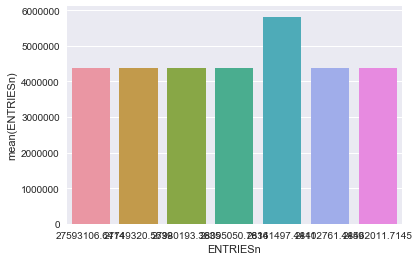

In [72]:
sns.barplot(x=group_Day, y=subwayfile_df2.ENTRIESn)

In [73]:
group_UNITDay

UNIT  day_week
R003  0           130729274
      1           117512552
      2            75499533
      3            96107188
      4            92142731
      5            87165254
      6           114530379
R004  0           379719878
      1           425675289
      2           286649682
      3           320130470
      4           301721293
      5           297934211
      6           375422813
R005  0           356556812
      1           375997076
      2           277926970
      3           291397106
      4           286782508
      5           248983324
      6           357539104
R006  0           286895607
      1           273589633
      2           219202985
      3           238918117
      4           240669313
      5           221128786
      6           283450407
R007  0           217974916
      1           245511182
                    ...    
R454  5            80766907
      6            97513726
R455  0           114877130
      1           119635865
     

In [28]:
df_day = subwayfile_df.groupby(['day_week'])

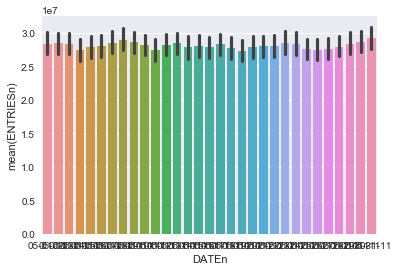

In [30]:
sns.barplot(x=subwayfile_df.DATEn, y=subwayfile_df.ENTRIESn)

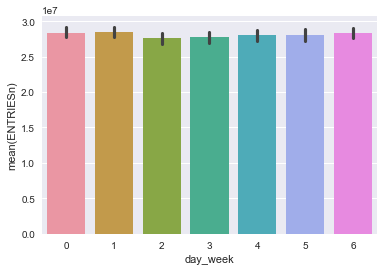

In [31]:
sns.barplot(x=subwayfile_df.day_week, y=subwayfile_df.ENTRIESn)

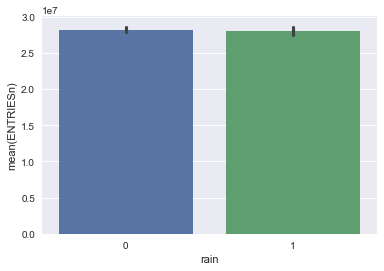

In [32]:
sns.barplot(x=subwayfile_df.rain, y=subwayfile_df.ENTRIESn)

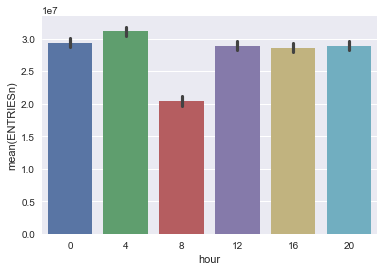

In [77]:
sns.barplot(x=subwayfile_df2.hour, y=subwayfile_df2.ENTRIESn)

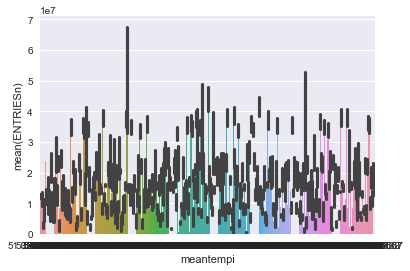

In [33]:
sns.barplot(x=subwayfile_df.meantempi, y=subwayfile_df.ENTRIESn)

# Calculating Hourly Entries and Exits

In [36]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [35]:
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [34]:
get_hourly_entries_and_exits(entries_and_exits)

NameError: name 'get_hourly_entries_and_exits' is not defined

In [81]:
def calc_get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    return ridership_df[['ENTRIESn','EXITSn']].apply(get_hourly_entries_and_exits)

In [11]:
calc_get_hourly_entries_and_exits(ridership_df)

NameError: name 'calc_get_hourly_entries_and_exits' is not defined

# Combining Pandas DataFrames

In [102]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

In [103]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [104]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df,on='DATEn',how='inner')

In [105]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour_x,latitude_x,longitude_x,fog,hour_y,latitude_y,longitude_y,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
3,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
4,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
5,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
7,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
8,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,0,40.689945,-73.872564,30.14,0,54.0,3.5
9,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,0,40.691320,-73.867135,30.14,0,54.0,3.5


# Plotting for DataFrames

In [101]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for this block of code to see what it does

In [100]:
# groupby() without as_index
if True:
    first_even = example_df.groupby('even').first()
    print (first_even)
    print (first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame

NameError: name 'example_df' is not defined

In [89]:
# groupby() with as_index=False
if True:
    first_even = example_df.groupby('even', as_index=False).first()
    print (first_even)
    print (first_even['even']) # Now 'even' is still a column in the DataFrame

    even  above_three  value
0  False        False      1
1   True        False      2
0    False
1     True
Name: even, dtype: bool


In [90]:
subwayfile_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [134]:
subwayfile_df.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

In [ ]:
## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

In [99]:
group_rain = subwayfile_df.groupby('rain').sum('ENTRIESn')

TypeError: f() takes 1 positional argument but 2 were given

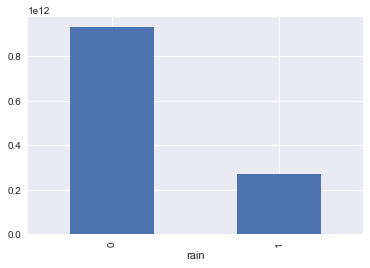

In [13]:
group_rain.plot.bar(x='rain')

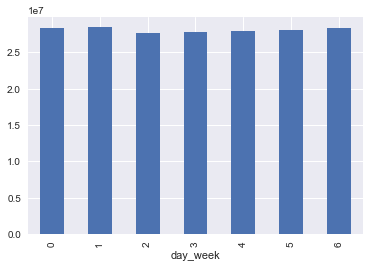

In [23]:
group_Day.plot.bar()

In [24]:
group_DayRain = subwayfile_df2.groupby(['day_week','rain'])['ENTRIESn'].(agg('sum'))

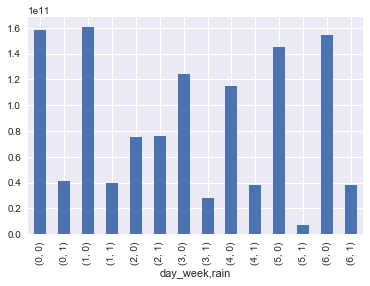

In [25]:
group_DayRain.plot.bar()

In [77]:
group_loc = subwayfile_df.groupby(['latitude','longitude'],as_index = False).mean()

In [116]:
size_entries = (subwayfile_df['ENTRIESn_hourly']/subwayfile_df['ENTRIESn_hourly'].std(ddof=0))*5

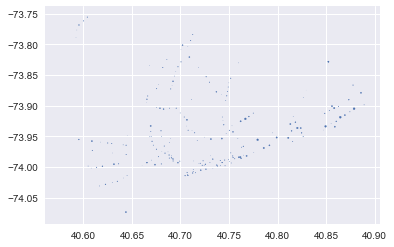

In [117]:
plt.scatter(group_loc['latitude'], group_loc['longitude'], s = size_entries)

In [118]:
group_temp = subwayfile_df.groupby(['meantempi'],as_index = False).mean()

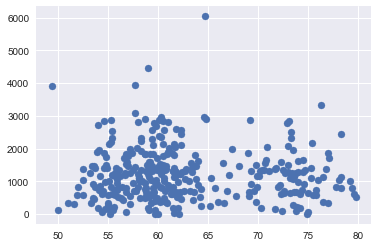

In [98]:
plt.scatter(group_temp['meantempi'], group_temp['ENTRIESn_hourly'])

In [107]:
data_by_location = subwayfile_df.groupby(['latitude', 'longitude'], as_index=False).mean() 

In [108]:
scaled_by_precipi = data_by_location['precipi'] / data_by_location['precipi'].std() * 5